In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Load the Seed Dataset

df = pd.read_csv("/home/roots/Desktop/my_git_repo/MLlearning/models/svc(support vector mechine)/Seed_Data.csv",)
print(df.columns)

Index(['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG', 'target'], dtype='object')


In [9]:
X = df[['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG']]
y = df['target']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

"""
This creates an instance of an SVM classifier.

SVC stands for Support Vector Classification, and it's part of sklearn.svm.

Inside the parentheses:
kernel='rbf'

Chooses the Radial Basis Function (RBF) kernel.

RBF is a popular non-linear kernel that maps features into higher-dimensional space to handle complex data.

If your data is not linearly separable, RBF works well.

C=1.0

This is the regularization parameter.

It controls the trade-off between:

achieving a low training error

and maintaining a smooth decision boundary.

Smaller C (e.g., 0.1): more regularization, allowing some misclassifications to improve generalization.

Larger C (e.g., 100): less regularization, trying to fit the training data as best as possible, possibly overfitting.

gamma='scale'

Controls how far the influence of a single training example reaches.

"""

SVC()

In [12]:
y_pred = svm_model.predict(X_test_scaled)

# 7. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  0  1]
 [ 0 14  0]
 [ 3  0 14]]


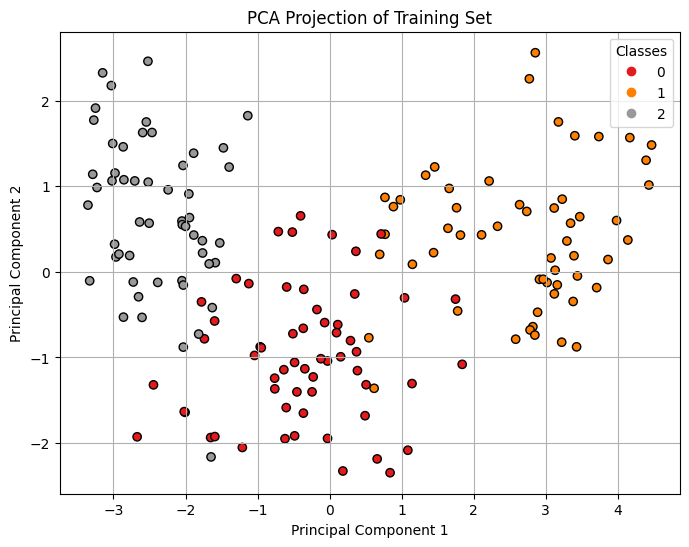

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='Set1', edgecolors='k')
plt.title("PCA Projection of Training Set")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()